In [1]:
import os

import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from styles import *

In [47]:
gaze = pd.read_pickle('data/Gaze.pkl')
eer = pd.read_pickle('data/eer_self.pkl')

eer['scale_group'] = eer['scale']
eer['x'] = 'original'
gaze.replace('Comb-reverse', 'Comb Reverse', inplace=True)

gaze['s2'] = gaze['scale_group'] + 'S'
gaze_extra = gaze.copy()
gaze_extra['s2'] = gaze['scale_group'] + 'P'

gaze = pd.concat([gaze, gaze_extra])


In [48]:
eer2 = pd.read_pickle('data/eer_base.pkl')
eer2['x'] = 'filtered'
eer2['scale_group'] = eer2['scale']

eer = pd.concat([eer, eer2])

In [49]:
gaze

,gaze_angle_error_source,gaze_angle_error_filtered,filter,Filter,scale_group,s2
0,1.528435,0.876621,bilateral_filter,Bilateral filter,1x,1xS
1,1.683287,3.377988,bilateral_filter,Bilateral filter,1x,1xS
2,0.834842,2.074067,bilateral_filter,Bilateral filter,1x,1xS
3,0.489678,2.120429,bilateral_filter,Bilateral filter,1x,1xS
4,2.176911,1.718885,bilateral_filter,Bilateral filter,1x,1xS
...,...,...,...,...,...,...
245,0.655202,47.769411,super_filter_reverse,Comb Reverse,10x,10xP
246,0.288310,3.494390,super_filter_reverse,Comb Reverse,10x,10xP
247,1.644007,11.559635,super_filter_reverse,Comb Reverse,10x,10xP
248,0.819984,1.433844,super_filter_reverse,Comb Reverse,10x,10xP


In [50]:
def get_eer(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['eer']
    return float(ev)

def get_frr(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_frr']
    return float(ev)

gaze['eer'] = gaze.apply(get_eer, axis=1)
gaze['frr'] = gaze.apply(get_frr, axis=1)

In [51]:
def get_f1(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_f1']
    return float(ev)

def get_precision(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_precision']
    return float(ev)

def get_recall(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_recall']
    return float(ev)

gaze['f1'] = gaze.apply(get_f1, axis=1)
gaze['precision'] = gaze.apply(get_precision, axis=1)
gaze['recall'] = gaze.apply(get_recall, axis=1)

In [52]:
gaze['Gaze error'] = gaze['gaze_angle_error_filtered']
gaze['EER'] = gaze['eer']*100
gaze['TAR'] = 1-gaze['frr']

In [53]:
gaze['relative'] = gaze['gaze_angle_error_filtered'] / gaze['gaze_angle_error_source']

In [55]:
gaze[gaze['s2'] == '1xP']

,gaze_angle_error_source,gaze_angle_error_filtered,filter,Filter,scale_group,s2,eer,frr,f1,precision,recall,Gaze error,EER,TAR,relative
0,1.528435,0.876621,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,0.876621,9.215130,0.999104,0.573542
1,1.683287,3.377988,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,3.377988,9.215130,0.999104,2.006780
2,0.834842,2.074067,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,2.074067,9.215130,0.999104,2.484384
3,0.489678,2.120429,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,2.120429,9.215130,0.999104,4.330248
4,2.176911,1.718885,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,1.718885,9.215130,0.999104,0.789598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.655202,1.078174,super_filter_reverse,Comb Reverse,1x,1xP,0.233218,1.000000,NaN,NaN,0.000000,1.078174,23.321752,0.000000,1.645561
246,0.288310,1.877969,super_filter_reverse,Comb Reverse,1x,1xP,0.233218,1.000000,NaN,NaN,0.000000,1.877969,23.321752,0.000000,6.513705
247,1.644007,0.422591,super_filter_reverse,Comb Reverse,1x,1xP,0.233218,1.000000,NaN,NaN,0.000000,0.422591,23.321752,0.000000,0.257049
248,0.819984,2.121560,super_filter_reverse,Comb Reverse,1x,1xP,0.233218,1.000000,NaN,NaN,0.000000,2.121560,23.321752,0.000000,2.587318


In [96]:
included = [
    'Bilateral filter',
    'Gaussian filter',
    'Non-local means',
    'Cauchy noise',
    'Snow noise',
    'Comb',
    #'Comb Reverse'
]
ft = gaze[gaze['Filter'].isin(included)]

In [95]:
m = ft.groupby(['Filter', 's2']).mean()
m['relative_real'] = m['gaze_angle_error_filtered'] / m['gaze_angle_error_source']
#ft = m.reset_index()

In [98]:
ft['Gaze relative'] = ft['relative_real']
ft['scale'] = ft['scale_group'].apply(lambda s: float(s[:-1]))
ft['group'] = ft['s2'].apply(lambda s: 'Internal' if s[-1] == 'P' else 'External')

KeyError: 'relative_real'

In [78]:
ft[ft['group'] == 'Internal']

,gaze_angle_error_source,gaze_angle_error_filtered,filter,Filter,scale_group,s2,eer,frr,f1,precision,recall,Gaze error,EER,TAR,relative,Gaze relative,scale,group
0,1.528435,0.876621,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,0.876621,9.215130,0.999104,0.573542,0.573542,1.0,Internal
1,1.683287,3.377988,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,3.377988,9.215130,0.999104,2.006780,2.006780,1.0,Internal
2,0.834842,2.074067,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,2.074067,9.215130,0.999104,2.484384,2.484384,1.0,Internal
3,0.489678,2.120429,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,2.120429,9.215130,0.999104,4.330248,4.330248,1.0,Internal
4,2.176911,1.718885,bilateral_filter,Bilateral filter,1x,1xP,0.092151,0.000896,0.00266,0.002667,0.999104,1.718885,9.215130,0.999104,0.789598,0.789598,1.0,Internal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.655202,57.629895,super_filter,Comb,10x,10xP,0.394205,1.000000,NaN,NaN,0.000000,57.629895,39.420535,0.000000,87.957464,87.957464,10.0,Internal
246,0.288310,6.062718,super_filter,Comb,10x,10xP,0.394205,1.000000,NaN,NaN,0.000000,6.062718,39.420535,0.000000,21.028438,21.028438,10.0,Internal
247,1.644007,3.592705,super_filter,Comb,10x,10xP,0.394205,1.000000,NaN,NaN,0.000000,3.592705,39.420535,0.000000,2.185334,2.185334,10.0,Internal
248,0.819984,3.009389,super_filter,Comb,10x,10xP,0.394205,1.000000,NaN,NaN,0.000000,3.009389,39.420535,0.000000,3.670057,3.670057,10.0,Internal


In [86]:
def create_gaze_plot(group):
    fig, ax = plt.subplots(1, 1, figsize=set_size('article-col'))
    g = sns.lineplot(
        x='EER', 
        y='Gaze relative', 
        hue='Filter', 
        data=ft[ft['group'] == group], 
        palette=sns.color_palette("gray", 6),
        markers=True, 
        style='Filter',
        err_style='bars',
        legend=True,
        ax=ax)

    sns.despine()

    ax.set_xlabel('EER \%')
    ax.set_ylim((0, 20))
    #ax.set_xlim((10e-6, 1))
    #ax.set_xscale('log')

    g.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3)
    return fig

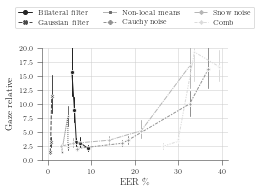

In [87]:
create_gaze_plot('Internal').savefig('out/gaze-internal.pdf', bbox_inches='tight')

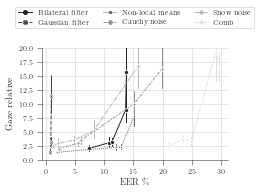

In [88]:
create_gaze_plot('External').savefig('out/gaze-external.pdf', bbox_inches='tight')

In [40]:
gaze['scale'] = gaze['scale_group'].apply(lambda s: float(s[:-1]))

In [41]:
comb = gaze.groupby(['Filter', 'scale_group']).mean()
comb['relative'] = comb['gaze_angle_error_filtered']/comb['gaze_angle_error_source']

In [42]:
c2 = comb.reset_index()
c2

,Filter,scale_group,gaze_angle_error_source,gaze_angle_error_filtered,eer,frr,f1,precision,recall,Gaze error,EER,TAR,scale,relative
0,Bilateral filter,1.5x,1.231023,2.341536,0.107673,0.506046,0.201549,0.340472,0.493954,2.341536,10.767251,0.493954,1.5,1.902106
1,Bilateral filter,10x,1.231023,10.119690,0.138072,0.614476,0.150388,0.246572,0.385524,10.119690,13.807196,0.385524,10.0,8.220552
2,Bilateral filter,1x,1.231023,1.356724,0.074348,0.409203,0.279598,0.530805,0.590797,1.356724,7.434750,0.590797,1.0,1.102111
3,Bilateral filter,2x,1.231023,2.761225,0.112909,0.517745,0.189566,0.312341,0.482255,2.761225,11.290852,0.482255,2.0,2.243033
4,Bilateral filter,5x,1.231023,6.994988,0.136483,0.604176,0.152827,0.248944,0.395824,6.994988,13.648305,0.395824,5.0,5.682256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Uniform noise,1.5x,1.231023,1.803991,0.043502,0.970499,0.028655,1.000000,0.029501,1.803991,4.350234,0.029501,1.5,1.465441
61,Uniform noise,10x,1.231023,11.920363,0.173957,0.999944,0.000056,1.000000,0.000056,11.920363,17.395701,0.000056,10.0,9.683297
62,Uniform noise,1x,1.231023,1.223227,0.020425,0.729680,0.212797,1.000000,0.270320,1.223227,2.042520,0.270320,1.0,0.993667
63,Uniform noise,2x,1.231023,2.145789,0.048434,0.982591,0.017111,1.000000,0.017409,2.145789,4.843386,0.017409,2.0,1.743094


In [59]:
c2.pivot(index='scale', columns='Filter', values=['eer'])

eer                                                      \
Filter Bilateral filter Cauchy noise      Comb Comb Reverse Gaussian filter   
scale                                                                         
1.0            0.074348     0.022128  0.210516     0.128614        0.007514   
1.5            0.107673     0.054719  0.249053     0.148699        0.008410   
2.0            0.112909     0.060486  0.235263     0.159314        0.008410   
5.0            0.136483     0.151097  0.290841     0.188158        0.008410   
10.0           0.138072     0.198895  0.297221     0.220342        0.009538   

                                                                 \
Filter Gaussian noise Laplacian noise Mean filter Median filter   
scale                                                             
1.0          0.026802        0.029996    0.007094      0.008003   
1.5          0.032880        0.029622    0.007094      0.008003   
2.0          0.066546        0.066598    0.007094      0.008003   
5.0          0.118174        0.146984    0.007735      0.008846   
10.0         0.204642        0.210920    0.009340      0.008846   

                                                                       
Filter Non-local means Salt-and-pepper noise Snow noise Uniform noise  
scale                                                                  
1.0           0.019573              0.049525   0.012420      0.020425  
1.5           0.120811              0.065692   0.020628      0.043502  
2.0           0.128917              0.111646   0.047827      0.048434  
5.0           0.151027              0.206262   0.081682      0.126277  
10.0          0.151027              0.242369   0.158088      0.173957

In [60]:
d = c2.pivot(index='Filter', columns=['scale'], values=['relative'])
d

relative                                          
scale                      1.0       1.5       2.0        5.0        10.0
Filter                                                                   
Bilateral filter       1.102111  1.902106  2.243033   5.682256   8.220552
Cauchy noise           1.260007  1.893831  2.104392   5.750758   9.527973
Comb                   1.506256  2.032184  2.292788  12.586033  10.762883
Comb Reverse           1.691954  2.490962  2.827323   5.921448  11.695600
Gaussian filter        0.868770  2.112422  2.112422   2.112422   5.404615
Gaussian noise         1.321484  1.357282  2.287872   4.398813  12.363403
Laplacian noise        1.444444  1.449862  2.363903   5.054720  11.906605
Mean filter            0.836769  0.836769  0.836769   1.102236   3.427295
Median filter          0.856796  0.856796  0.856796   2.959353   2.959353
Non-local means        1.030968  1.255136  1.286794   4.375777   4.375777
Salt-and-pepper noise  2.010670  1.801505  4.327218   8.692576  11.467722
Snow noise             1.589904  1.832392  2.170947   2.796608   9.475649
Uniform noise          0.993667  1.465441  1.743094   5.412937   9.683297

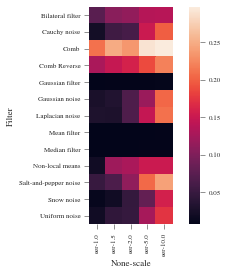

In [55]:
sns.heatmap(d, square=True)

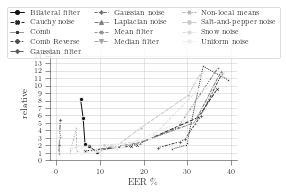

In [124]:
fig, ax = plt.subplots(1, 1, figsize=set_size('article-col'))
g = sns.lineplot(
    x='EER', 
    y='relative', 
    hue='Filter', 
    data=comb, 
    palette=sns.color_palette("gray", 13),
    markers=True, 
    style='Filter',
    err_style='bars',
    legend=True,
    ax=ax)

sns.despine()

ax.set_xlabel('EER \%')
ax.set_ylim((0, 15))
ax.set_yticks(np.arange(0, 15, 1))
#ax.set_xlim((10e-6, 1))
#ax.set_xscale('log')

g.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3)
fig.savefig('out/gaze3.pdf', bbox_inches='tight')